<a href="https://colab.research.google.com/github/MehediAhamed/vlmrun-cookbook/blob/removed-unused-library-quickstart/notebooks/00_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).

## VLM Run Quickstart

This notebook demonstrates how to use [VLM Run](https://vlm.run) to extract structured data from visual content using the official `vlmrun` client.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 35.9 MB/s eta 0:00:00


## Example: Invoice Analysis

Let's analyze an example invoice using VLM Run. We'll download a sample invoice and extract structured data from it.

In [2]:
from vlmrun.common.utils import download_image
from PIL import Image
from IPython.display import display

image: Image.Image = download_image("https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.invoice/invoice_1.jpg")

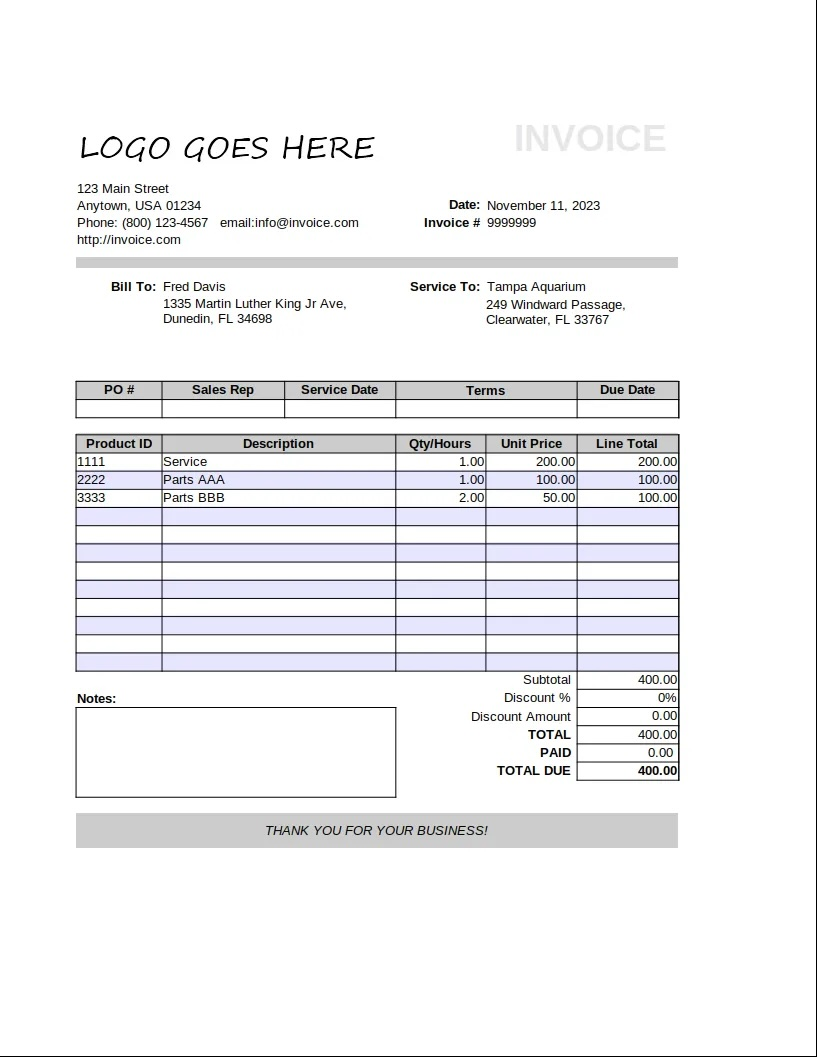

In [3]:
display(image)

### Using the VLM Run Client

First, let's set up our client:

In [4]:
import os
import getpass

VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

··········


In [5]:
# Initialize the client
from vlmrun.client import VLMRun

client = VLMRun(api_key=VLMRUN_API_KEY)

In [13]:
from vlmrun.client.types import PredictionResponse

response: PredictionResponse = client.image.generate(
    images=[image],
    domain="document.invoice"
)
result = response.response

### Now let's analyze the invoice:

In [14]:
# Print the results
print("Invoice Details:")
print(f"Invoice ID: {result['invoice_id']}")
print(f"Issue Date: {result['invoice_issue_date']}")
print(f"Due Date: {result['invoice_due_date']}")
print(f"Period: {result['period_start']} - {result['period_end']}")

print("\nIssuer Details:")
print(f"Name: {result['issuer']}")
if result['issuer_address']:
    print(f"Address: {result['issuer_address']}")

print("\nCustomer Details:")
print(f"Name: {result['customer']}")
print(f"Customer ID: {result['customer_id']}")
if result['customer_email']:
    print(f"Email: {result['customer_email']}")
if result['customer_phone']:
    print(f"Phone: {result['customer_phone']}")
if result['customer_billing_address']:
    print("\nBilling Address:")
    print(result['customer_billing_address'])
if result['customer_shipping_address']:
    print("\nShipping Address:")
    print(result['customer_shipping_address'])

print("\nFinancial Details:")
if result['items']:
    print("\nItems:")
    for item in result['items']:
        print(f"- {item}")
print(f"Subtotal: {result['subtotal']:.2f} {result['currency']}")
if result['tax']:
    print(f"Tax: {result['tax']:.2f} {result['currency']}")
print(f"Total: {result['total']:.2f} {result['currency']}")

if result['notes']:
    print("\nNotes:")
    print(result['notes'])

Invoice Details:
Invoice ID: 9999999
Issue Date: 2023-11-11
Due Date: None
Period: None - None

Issuer Details:
Name: invoice.com
Address: {'street': '123 Main Street', 'city': 'Anytown', 'state': None, 'postal_code': '01234', 'country': 'USA'}

Customer Details:
Name: Fred Davis
Customer ID: None

Billing Address:
{'street': '1335 Martin Luther King Jr Ave,', 'city': 'Dunedin', 'state': 'FL', 'postal_code': '34698', 'country': None}

Shipping Address:
{'street': '249 Windward Passage,', 'city': 'Clearwater', 'state': 'FL', 'postal_code': '33767', 'country': None}

Financial Details:

Items:
- {'description': 'Service', 'quantity': 1, 'currency': 'USD', 'unit_price': 200.0, 'total_price': 200.0}
- {'description': 'Parts AAA', 'quantity': 1, 'currency': 'USD', 'unit_price': 100.0, 'total_price': 100.0}
- {'description': 'Parts BBB', 'quantity': 2, 'currency': 'USD', 'unit_price': 50.0, 'total_price': 100.0}
Subtotal: 400.00 USD
Total: 400.00 USD


That's it! You've successfully used VLM Run to extract structured data from an invoice. Check out our other cookbooks for more examples and use cases.

## Next Steps

- Explore more examples in our [cookbooks](https://docs.vlm.run/guides)
- Check out supported domains in the [Hub Catalog](https://docs.vlm.run/hub)
- Learn about [custom schemas](https://docs.vlm.run/custom-schemas) for your specific use case

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Lance Hybrid Search](https://lancedb.github.io/lancedb/hybrid_search/hybrid_search/)
- [Fashion Dataset](https://huggingface.co/datasets/ashraq/fashion-product-images-small)